In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import classification_report


In [689]:
data = pd.read_csv('../dataset/preprocessed_train_data')
data

,passenger_id,age,room_service,food_court,shopping_mall,spa,v_r_deck,name,transported,Europa,...,deck_D,deck_E,deck_F,deck_G,deck_T,deck_unknown,side_S,side_unknown,v_i_p_True,v_i_p_unknown
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,1,...,0,0,0,0,0,0,0,0,1,0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0,...,0,0,0,1,0,0,1,0,0,0
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,0,...,0,0,0,1,0,0,1,0,0,0
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1,...,0,1,0,0,0,0,1,0,0,0


In [690]:
data = data.drop(columns=['passenger_id', 'name'])
data.columns = data.columns.str.lower()

In [691]:
data

,age,room_service,food_court,shopping_mall,spa,v_r_deck,transported,europa,mars,unknown_planet,...,deck_d,deck_e,deck_f,deck_g,deck_t,deck_unknown,side_s,side_unknown,v_i_p_true,v_i_p_unknown
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [720]:
result = [x for x in data if x.transported == 1]
result

AttributeError: 'str' object has no attribute 'transported'

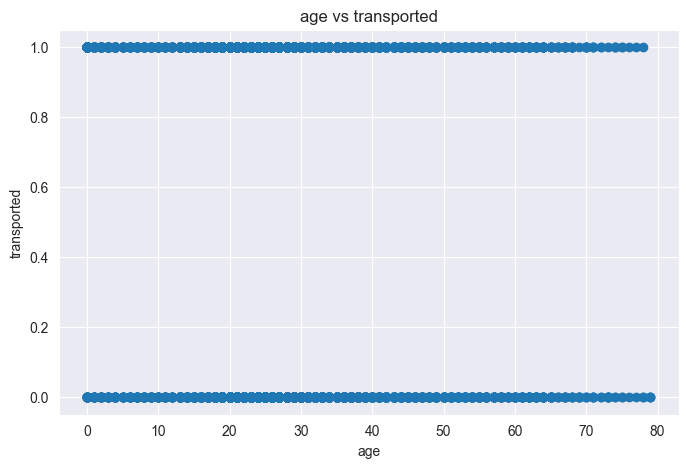

In [713]:
def data_scatter(f1, f2):
    plt.figure(figsize=(8, 5))
    plt.scatter(data[f1], data[f2])
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f'{f1} vs {f2}')
    plt.show()

data_scatter('age', 'transported')

3411

In [693]:
X = data.drop(columns='transported')
y = data['transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [694]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [695]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train

,age,room_service,food_court,shopping_mall,spa,v_r_deck,europa,mars,unknown_planet,cryo_sleep_true,...,deck_d,deck_e,deck_f,deck_g,deck_t,deck_unknown,side_s,side_unknown,v_i_p_true,v_i_p_unknown
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.215190,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.443038,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.329114,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.164557,0.000000,0.000000,0.004897,0.000045,0.253098,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,0.544304,0.000000,0.065307,0.000000,0.000000,0.081186,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6950,0.481013,0.012773,0.006809,0.000000,0.004909,0.018391,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6951,0.569620,0.000070,0.000235,0.004570,0.027356,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6952,0.303797,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [696]:
test_data = pd.read_csv('../dataset/test_data_svm.csv')
test_data.columns = test_data.columns.str.lower()
test_data = test_data.drop(columns='has_family')
passenger_id = test_data['passenger_id']
test_data = test_data.drop(columns='passenger_id')
test_data

,age,room_service,food_court,shopping_mall,spa,v_r_deck,europa,mars,unknown_planet,cryo_sleep_true,...,deck_d,deck_e,deck_f,deck_g,deck_t,deck_unknown,side_s,side_unknown,v_i_p_true,v_i_p_unknown
0,27.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,19.0,109.0,9.0,0.0,2823.0,0.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,31.0,43.0,0.0,0.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20.0,303.0,0.0,635.0,0.0,0.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4273,42.0,0.0,847.0,17.0,10.0,144.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4274,26.0,375.0,0.0,0.0,0.0,0.0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4275,26.0,0.0,2680.0,0.0,0.0,523.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [705]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = make_pipeline(
    RandomForestClassifier(
        n_estimators=500,
        criterion='entropy'
    )
)

model.fit(X_train, y_train)

,steps,"[('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,500
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'


In [706]:
model.score(X_train, y_train)

0.9995685936151855

In [707]:
model.score(X_test, y_test)

0.8131109833237493

In [708]:
y_pred = model.predict(X_test)

In [709]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       863
           1       0.84      0.78      0.81       876

    accuracy                           0.81      1739
   macro avg       0.82      0.81      0.81      1739
weighted avg       0.82      0.81      0.81      1739



In [710]:
predictions = model.predict(test_data)

In [711]:
submission = pd.DataFrame({
    'PassengerId': passenger_id,
    'Transported': predictions.astype(bool)
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission файлът е готов: submission.csv")

✅ Submission файлът е готов: submission.csv


In [712]:
importances = model.named_steps['randomforestclassifier'].feature_importances_
pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)

,feature,importance
11,num,0.187903
0,age,0.141618
4,spa,0.101001
1,room_service,0.087797
5,v_r_deck,0.085790
2,food_court,0.079696
9,cryo_sleep_true,0.075510
3,shopping_mall,0.067416
6,europa,0.023999
23,side_s,0.021301
